In [20]:
from langgraph.graph import START, END, StateGraph
from langchain_core.messages import HumanMessage, AIMessage
from langchain_openai import ChatOpenAI
from typing import List, TypedDict, Union
import os

os.environ["OPENAI_API_KEY"]

'sk-proj-1EAtSAzf5zOWyWiVQokoT3BlbkFJwnbKRGbySIGGen5PR6VG'

In [21]:
## chatbot with memory # gpt-4.1-nano

class AgentState(TypedDict):
    messages: List[Union[HumanMessage, AIMessage]]
    
llm = ChatOpenAI(model="gpt-4.1-mini")

In [22]:
def process(state:AgentState)-> AgentState:
    """call the llm"""
    response = llm.invoke(state["messages"])
    state["messages"].append(AIMessage(content=response.content))
    print(response.content)
    return state

In [23]:
graph = StateGraph(AgentState)

graph.add_node("process", process)
graph.add_edge(START, "process")

agent = graph.compile()


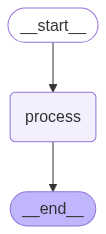

In [24]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))

In [27]:
inputs = input("Exter the text : ")
conversation_history = []

while inputs != "exit":
    conversation_history.append(HumanMessage(content=inputs))
    response = agent.invoke({"messages": conversation_history})
    conversation_history = response["messages"]
    inputs = input("Exter the text : ")

    
    

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-proj-********************************************R6VG. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}